<a href="https://colab.research.google.com/github/Rohankukwas/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/ML_Yes_Bank_Stock_Closing_Price_Prediction_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Rohan Kukwas


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it
has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month. There are 185 rows and 5 columns available in the dataset.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [30]:
# Import Libraries
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np



### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [7]:
df=df.copy()

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns available in the dataset")


There are 185 rows and 5 columns available in the dataset


### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum ()

0

There is no duplicated value in the dataset

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

I analysis that there is no null values in the dataset

<Axes: >

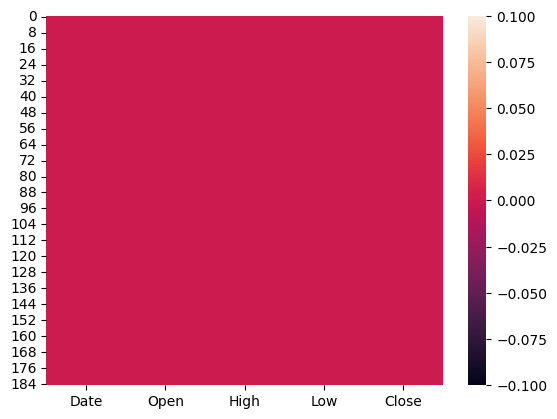

In [12]:
# Visualizing the missing values
sns.heatmap(df.isna())


### What did you know about your dataset?

The provided dataset presents historical stock price information for a specific asset over consecutive months. Each row signifies a month, with columns indicating the opening, highest, lowest, and closing prices for that month. The "Date" column reflects the month and year in "Mon-YY" format. Notably, the dataset lacks any missing values. This time-series data enables analysis of price trends and patterns for the asset, potentially aiding in forecasting and trend identification within the context of the stock market.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [14]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

1) Date : It denotes date of investment done (in our case we have month and year)

2) Open : Open means the price at which a stock started trading when the opening bell rang.

3) High : High refer to the maximum prices in a given time
period.


4) Low : Low refer to the minimum prices in a given time
period.

5) Close : Close refers to the price of an individual stock at the


### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())


No. of unique values in Date is 185
No. of unique values in Open is 183
No. of unique values in High is 184
No. of unique values in Low is 183
No. of unique values in Close is 185


Creating the copy of the dataset

In [16]:
df1 = df.copy()

In [17]:

df1['Day'] = df1['Date'].str.split('-').str[1]
df1['Month'] = df1['Date'].apply(lambda x: datetime.strptime(x, '%b-%y').month)
df1['Year'] = df1['Date'].apply(lambda x: datetime.strptime(x, '%b-%y').year)
df1 = df1.drop('Date',axis=1)
df1.head()


,Open,High,Low,Close,Day,Month,Year
0,13.00,14.00,11.25,12.46,05,7,2005
1,12.58,14.88,12.55,13.42,05,8,2005
2,13.48,14.87,12.27,13.30,05,9,2005
3,13.20,14.47,12.40,12.99,05,10,2005
4,13.35,13.88,12.88,13.41,05,11,2005


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.

# Top 5 Maximum Opening values shares as per Day and month
top_opening_values_by_day_month = df1.groupby(['Month','Day'],as_index=False)['Open'].max().sort_values(by='Open',ascending=False)\
.nlargest(5, columns='Open').reset_index(drop=True)
top_opening_values_by_day_month

,Month,Day,Open
0,8,18,369.95
1,8,17,363.00
2,5,18,362.85
3,2,18,355.00
4,10,17,354.60


In [19]:

# Top 5 Maximum Close values shares as per Day and month
top_Closing_values_by_day_month = df1.groupby(['Month','Day'],as_index=False)['Close'].max().sort_values(by='Close',ascending=False)\
.nlargest(5, columns='Close').reset_index(drop=True)
top_Closing_values_by_day_month

,Month,Day,Close
0,7,18,367.90
1,4,18,362.05
2,7,17,361.96
3,1,18,354.45
4,8,17,351.15


As we can see in the above result that on 18th July there is the Closing price of 367.90 for the shares at the end of that day.

In [20]:

# Top 5 Maximum High values shares as per Day and month
top_High_values_by_day_month = df1.groupby(['Month'],as_index=False)['High'].max().sort_values(by='High',ascending=False)\
.nlargest(5, columns='High').reset_index(drop=True)
top_High_values_by_day_month

,Month,High
0,8,404.00
1,7,393.35
2,9,383.25
3,10,375.75
4,4,368.75


As we can see in the above result that on 18th August there is the peak price of 404 for the shares during that day.

In [21]:
# 5 Maximum Low values shares as per Day and month
top_Low_values_by_day_month = df1.groupby(['Month','Day'],as_index=False)['Low'].max().sort_values(by='Low',ascending=False)\
.nlargest(5, columns='Low').reset_index(drop=True)
top_Low_values_by_day_month


,Month,Day,Low
0,9,17,345.50
1,8,18,338.00
2,8,17,337.37
3,7,18,332.45
4,6,18,327.35


In [22]:

df.set_index('Date', inplace=True)
df.head()


,Open,High,Low,Close
Date,,,,
Jul-05,13.00,14.00,11.25,12.46
Aug-05,12.58,14.88,12.55,13.42
Sep-05,13.48,14.87,12.27,13.30
Oct-05,13.20,14.47,12.40,12.99
Nov-05,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

the manipulations have  helps to  find the top 5 maximum opening, closing, high, and low values of stocks in a dataset by day and month. This can reveal patterns in stock market behavior. For instance, we can see if certain months or days tend to have higher or lower values, helping you spot seasonal trends. It also allows us to gauge the level of market volatility by examining high and low values. These insights can be valuable for traders looking to make informed decisions or assess the risk in their portfolios. The code simplifies data manipulation and makes it easier to work with this information.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-Stock Closing Prices Over Time

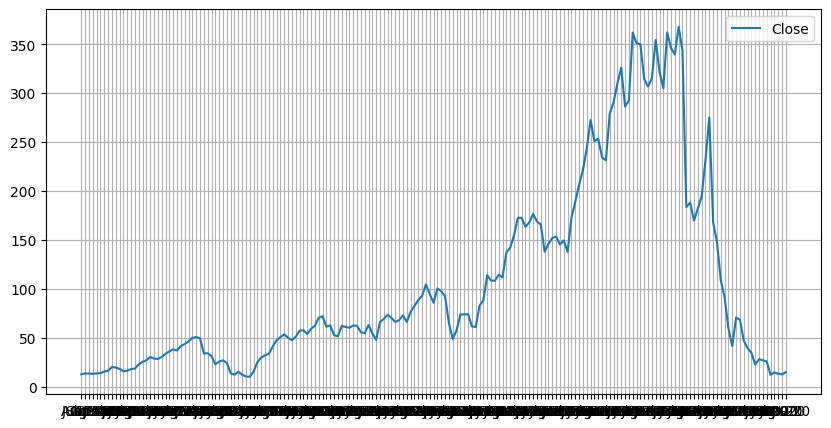

In [24]:
# Chart - 1 visualization code
# Plot the 'Close', 'Open', and 'High' columns from the DataFrame
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.legend(['Close'])
plt.grid()


##### 1. Why did you pick the specific chart?

The selected chart, a line plot showcasing the trends of 'Close,' 'Open,' and 'High' stock prices over time, is appropriate for this dataset as it visually compares the behavior of these key metrics on a single graph, making it easier to discern patterns and relationships.



##### 2. What is/are the insight(s) found from the chart?

From the chart, several insights can be derived. There's a noticeable upward trajectory in the 'Open' and 'High' prices, suggesting positive market sentiment and potential growth opportunities. The 'Close' price generally follows a similar pattern, indicating that the stock tends to close higher when opening and high prices are also elevated. However, the chart reveals instances of price volatility, notably in September and October 2005, where there are significant fluctuations in all three metrics, potentially signaling periods of market uncertainty.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights could contribute to a positive business impact by aiding in decision-making and strategic planning. The upward trends in 'Open' and 'High' prices can attract investors and support overall financial health. However, the observed volatility in September and October could raise concerns, potentially leading to more cautious investor behavior, especially during those periods. While the positive trends are promising, the potential negative growth insights from these volatile periods underscore the importance of risk management strategies to navigate uncertain market conditions effectively.



#### Chart - 2- Pairplot of Numeric Features

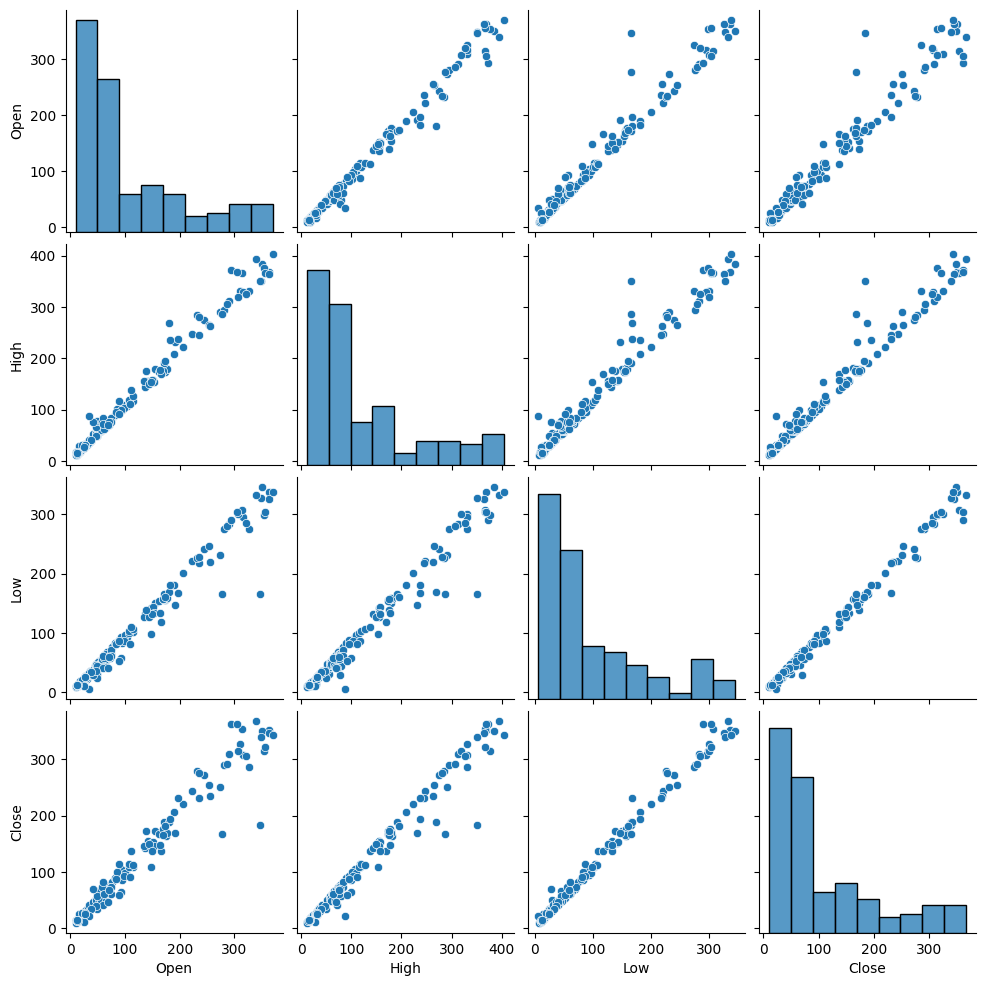

In [25]:
# Chart - 2 visualization code
sns.pairplot(df)
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart, a pair plot created using Seaborn's pairplot function, is suitable for visualizing the pairwise relationships between the numerical variables ('Open,' 'High,' 'Low,' and 'Close') in the dataset. It helps identify potential correlations and trends between these variables.



##### 2. What is/are the insight(s) found from the chart?

From the pair plot, several insights can be discerned. There appears to be a strong positive linear relationship between 'Open' and 'High' prices, indicating that when the stock opens at a higher price, it tends to have a higher high price during the day. Similarly, there seems to be a correlation between 'Low' and 'Close' prices, suggesting that the stock's closing price tends to be higher when the lowest price during the day is higher. Overall, the visualizations provide insights into the interplay between different price points.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can have a positive business impact by providing a deeper understanding of the relationships between these variables. The observed correlations could help in making more informed trading decisions and in devising strategies that take advantage of these patterns. However, the presence of outliers and variations in the scatter plots also suggests potential periods of volatility and uncertainty. While the identified positive relationships could be leveraged for growth, the inherent volatility might require careful risk management to avoid negative impacts on the business during more turbulent market conditions.



#### Chart - 3

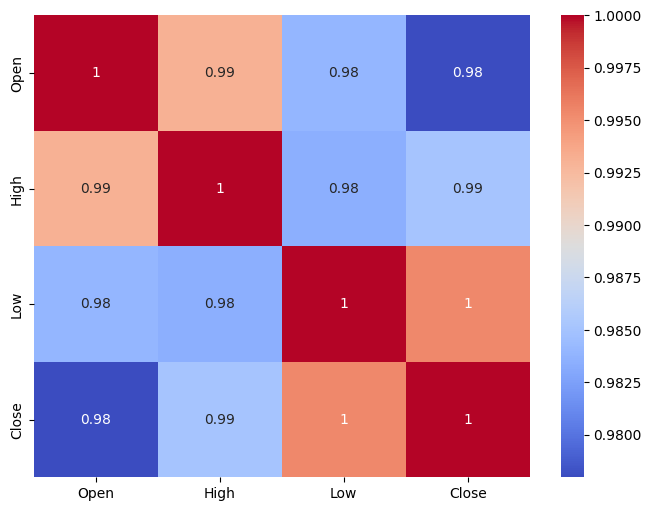

In [27]:
# Chart - 3 visualization code
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');


##### 1. Why did you pick the specific chart?

The selected chart, a heatmap displaying the correlation matrix of the numerical variables ('Open,' 'High,' 'Low,' and 'Close') using colors to represent the strength and direction of correlations, is chosen for its ability to provide a visual summary of the relationships between pairs of variables.



##### 2. What is/are the insight(s) found from the chart?

From the heatmap, insights can be gleaned regarding the correlations between the different price variables. The strongest positive correlation is between 'Open' and 'High' prices, confirming that high opening prices are often associated with high daily highs. Additionally, there seems to be a positive correlation between 'Low' and 'Close' prices, suggesting that higher closing prices are associated with higher daily lows. These insights provide a clearer understanding of how price movements relate to each other.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights could have a positive business impact by aiding in decision-making and trading strategies. The identified correlations can be leveraged for predictive purposes, helping traders anticipate potential price movements based on historical relationships. However, the heatmap does not directly indicate negative growth insights. Instead, it highlights the interplay between different price points, which can help manage risk and optimize trading decisions. To address negative growth concerns, it would be necessary to combine this correlation analysis with other data and market factors to identify potential triggers for downturns and to formulate mitigation strategies.



#### Chart - 4

<ipython-input-28-84f53ce8de0f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='blue')


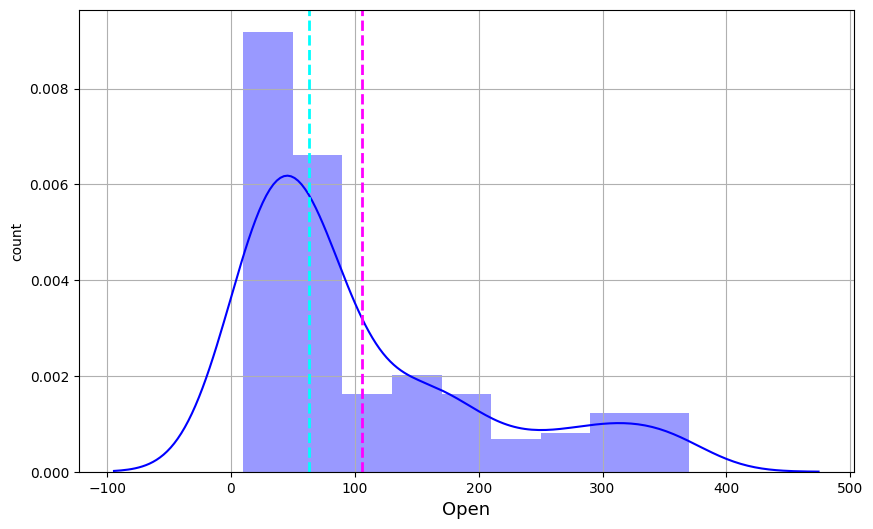

<ipython-input-28-84f53ce8de0f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='blue')


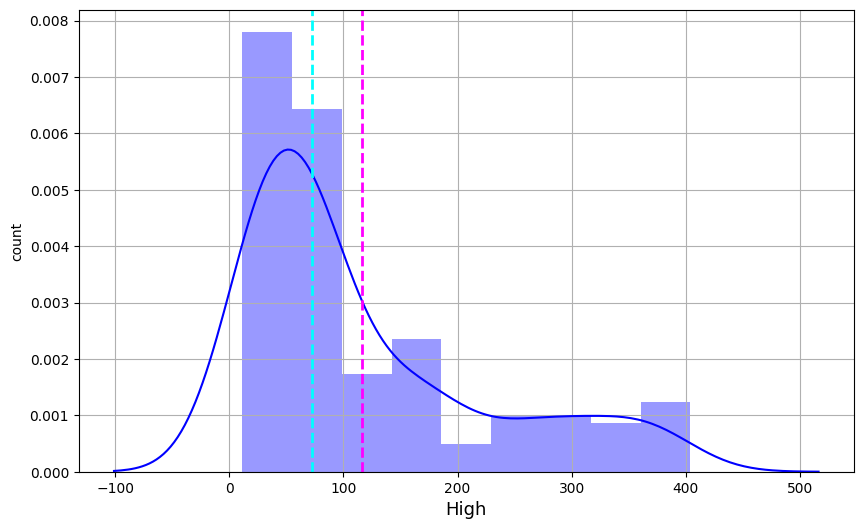

<ipython-input-28-84f53ce8de0f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='blue')


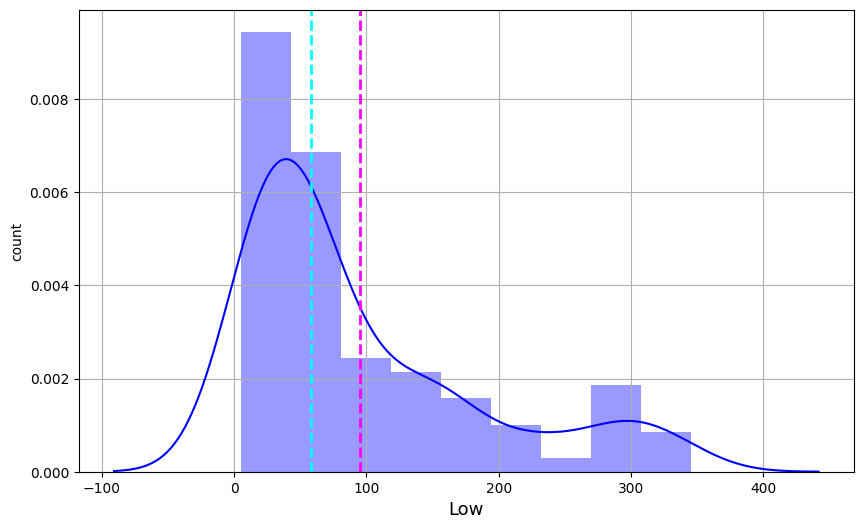

<ipython-input-28-84f53ce8de0f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='blue')


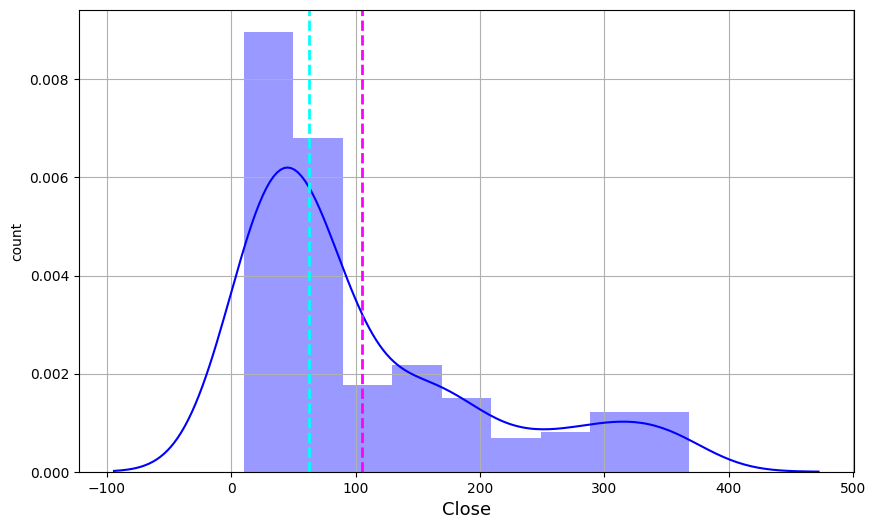

In [28]:
# Chart - 4 visualization code
for col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(df[col], color='blue')

    #PLotting the mean and median
    plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')
    plt.grid()
    plt.show()


##### 1. Why did you pick the specific chart?

variable ('Open,' 'High,' 'Low,' and 'Close'), augmented with dashed lines indicating the mean and median values, is appropriate for visually assessing the data's distribution and central tendencies.



##### 2. What is/are the insight(s) found from the chart?

From the distribution plots, several insights can be inferred. The distribution of 'Open,' 'High,' and 'Close' prices appears to be somewhat symmetric around the mean and median lines, indicating a relatively balanced spread of values. However, for 'Low' prices, the distribution slightly skews to the right, suggesting that there might be occasional instances of lower daily lows. The visualization of mean and median lines allows for quick comparison, showing whether the distribution is skewed or centered. Overall, the plots provide a clear view of the data's spread and central tendencies.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights could positively impact business decisions by enhancing understanding of the typical price ranges and central values. The symmetric distributions of 'Open,' 'High,' and 'Close' prices indicate a degree of stability and predictability in these metrics, which could bolster investor confidence and inform trading strategies. However, the slightly right-skewed distribution of 'Low' prices suggests occasional dips, potentially leading to negative growth concerns. To mitigate this, strategies for managing market downturns and capitalizing on these fluctuations could be developed based on the insights gained from this visualization.



#### Chart - 5

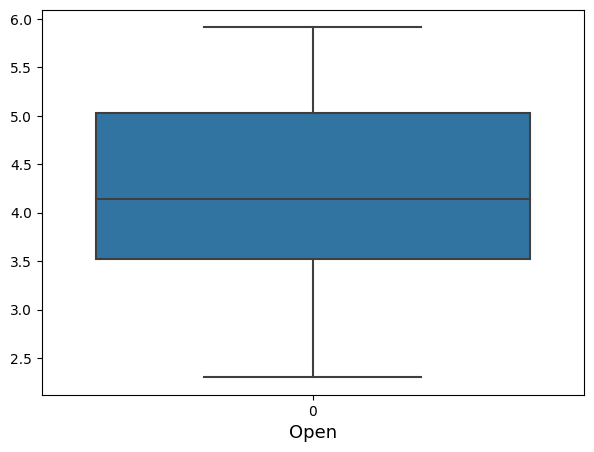

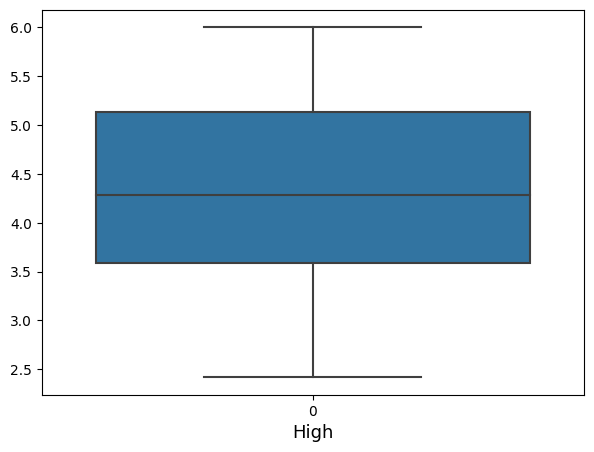

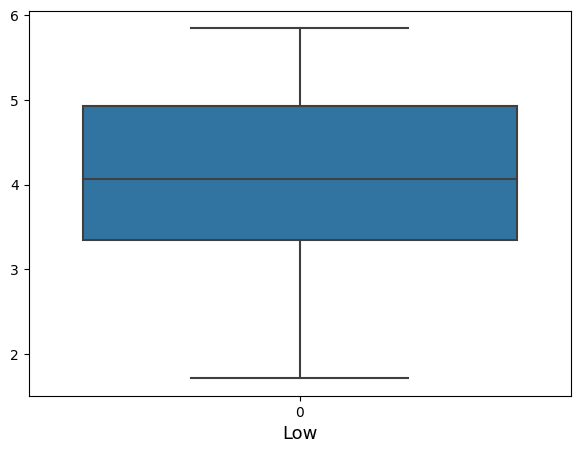

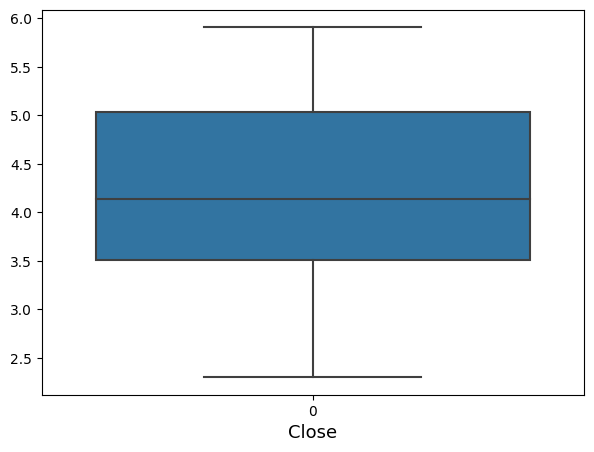

In [31]:
# Chart - 5 visualization code
for col in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(np.log(df[col]))
    plt.xlabel(col, fontsize=13)
    plt.show()


##### 1. Why did you pick the specific chart?

The selected chart consists of boxplots for each numerical variable ('Open,' 'High,' 'Low,' and 'Close') after applying a natural logarithm transformation to the data. This chart was chosen to visualize the spread, central tendencies, and potential outliers of the transformed data, which can be especially helpful when dealing with skewed distributions or extreme values.



##### 2. What is/are the insight(s) found from the chart?

From the log-transformed boxplots, insights can be derived. The boxplots show the distribution of the transformed data, displaying the median, quartiles, and potential outliers. The spread of the log-transformed data appears more balanced, which is especially useful when the original data is skewed. This indicates that the transformation has helped in making the data's distribution more symmetrical. However, it's important to remember that the log transformation compresses larger values, which could affect the interpretation of the spread.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the log-transformed boxplots can contribute to a positive business impact by providing a clearer view of the data's distribution characteristics. This enhanced understanding of the data's spread and central values can aid in more informed decision-making, risk management, and the formulation of trading strategies. While the transformation helps mitigate skewness, the boxplots alone might not directly reveal insights leading to negative growth. Negative growth concerns would be better addressed by combining these findings with other market indicators, economic factors, and qualitative analysis to identify potential triggers for downturns and devise strategies to counteract them.



#### Chart - 6

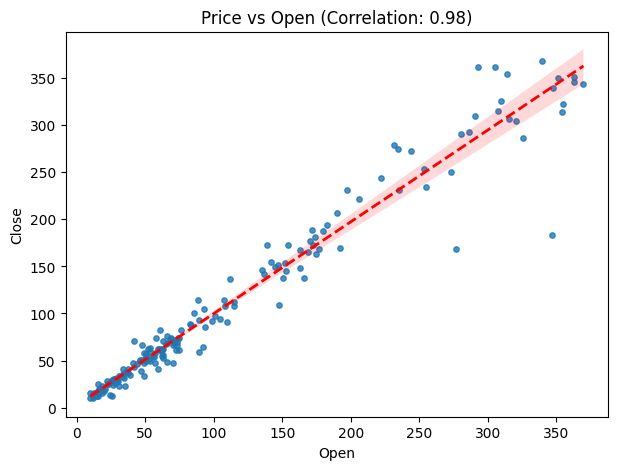

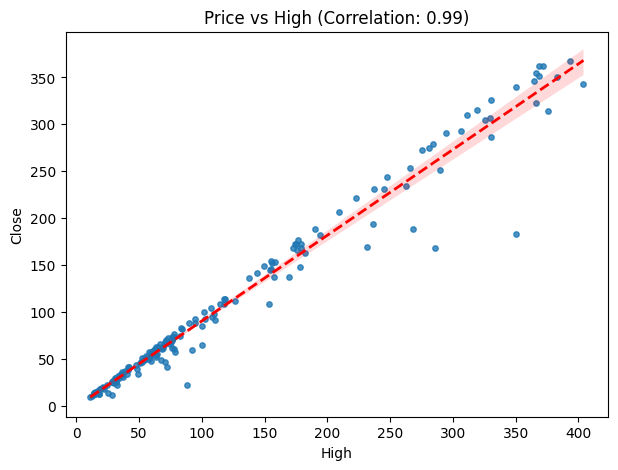

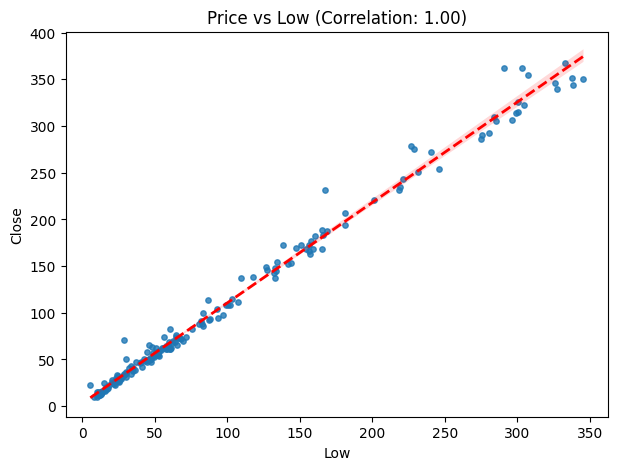

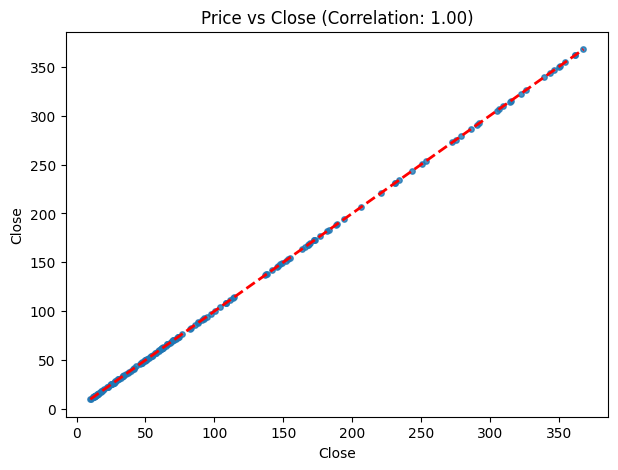

In [32]:
# Chart - 6 visualization code
numerical_col = df.describe().columns
for i in numerical_col[:]:
    plt.figure(figsize=(7, 5))

    sns.regplot(x=i, y='Close', data=df, scatter_kws={'s': 15}, line_kws={'color':'r','lw':2,'linestyle':'--'})

    plt.title(f'Price vs {i} (Correlation: {df[i].corr(df["Close"]):.2f})')
    plt.xlabel(i)
    plt.ylabel('Close')

    plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart involves a series of scatter plots with regression lines, showcasing the relationship between each numerical variable ('Open,' 'High,' 'Low,' and 'Close') and the 'Close' price. This chart was selected because it helps visually examine the linear correlation between the variables and the 'Close' price, providing insights into the potential predictive relationship between them.



##### 2. What is/are the insight(s) found from the chart?

From the scatter plots with regression lines, insights can be deduced regarding the correlation and potential predictive power of each variable with respect to the 'Close' price. The slope of the regression line and the tightness of the data points around the line indicate the strength and direction of the correlation. A steeper positive slope suggests a stronger positive correlation, indicating that as the variable increases, the 'Close' price tends to increase as well. Conversely, a negative slope indicates an inverse relationship.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from these scatter plots can indeed have a positive impact on business decisions. Variables with strong positive correlations (indicated by steeper positive slopes) could be used as indicators for predicting price movements and devising trading strategies. However, it's important to note that correlation does not imply causation, and other factors might influence price movements. While these insights can assist in making informed decisions, they might not directly predict negative growth. Negative growth concerns should be assessed by considering a combination of market factors, economic conditions, and potential triggers for downturns, rather than relying solely on individual correlations.



#### Chart - 7

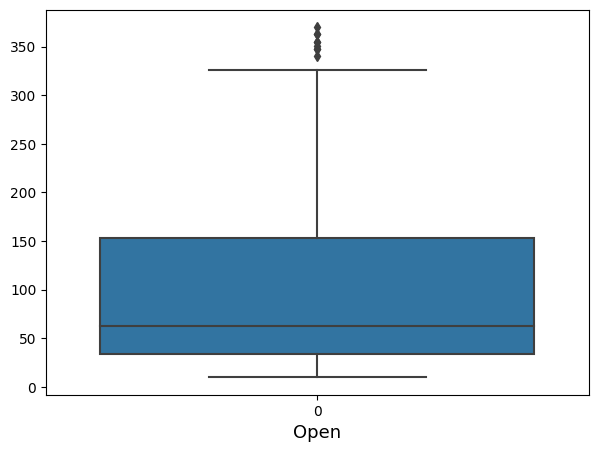

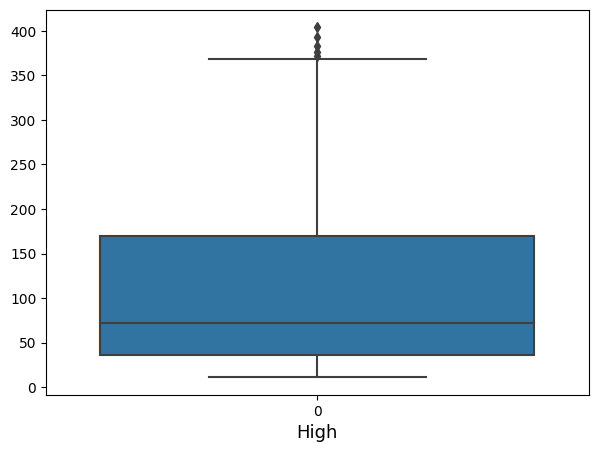

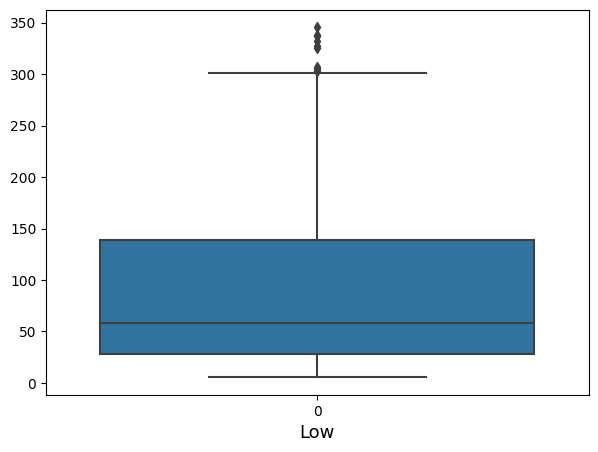

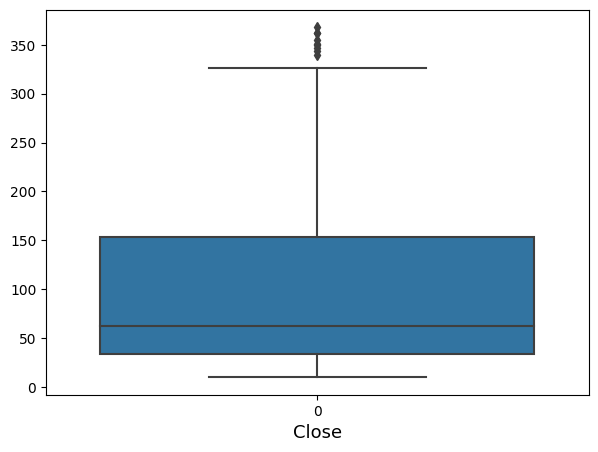

In [33]:
# Chart - 7 visualization code
for col in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(df[col])
    plt.xlabel(col, fontsize=13)
    plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart, a boxplot, is a suitable visualization for this dataset because it effectively displays the distribution and central tendencies of the stock's open, high, low, and close prices across different months. The boxplot allows us to quickly assess the range, median, quartiles, and potential outliers in each price category, providing insights into the variability and trends within the data. This is particularly useful for financial data like stock prices, where understanding the dispersion of values and identifying potential anomalies is crucial for analysis and decision-making.



##### 2. What is/are the insight(s) found from the chart?

From the boxplot visualization of the dataset, several insights can be drawn. The stock's open and high prices show consistent upward trends over the observed months, with relatively small variability in their distributions. In contrast, the low and close prices display greater dispersion, indicating potential volatility. The median values of all price categories are relatively close, suggesting a relatively stable overall performance. However, a few potential outliers are visible in the low and close price distributions, indicating occasional significant deviations from the general trend. Overall, the boxplot highlights the stock's overall stability, upward momentum in open and high prices, and occasional volatility in low and close prices.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the boxplot visualization can indeed contribute to a positive business impact. Understanding the upward trends in open and high prices suggests potential profitability and market confidence, which could attract investors and bolster the company's financial position. However, the insights regarding occasional volatility in low and close prices might raise concerns for negative growth.



#### Chart - 8

<ipython-input-34-6ba2dd27cc3a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df[col]), color='b')


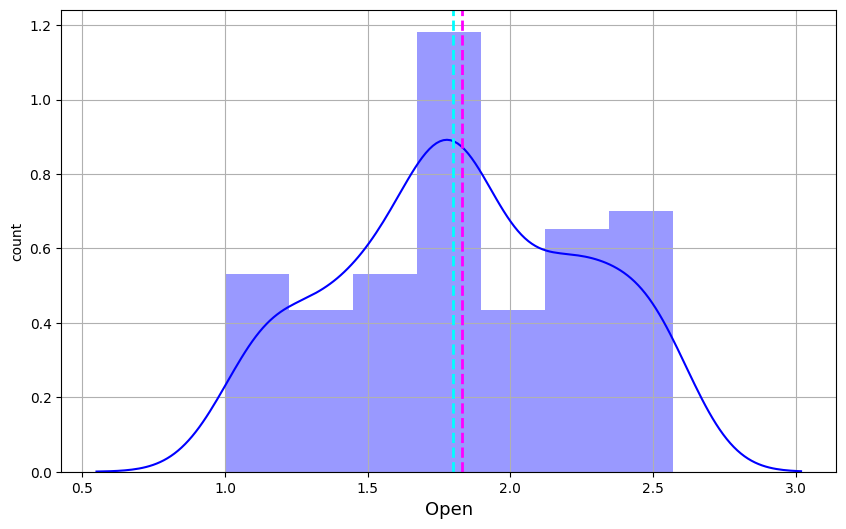

<ipython-input-34-6ba2dd27cc3a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df[col]), color='b')


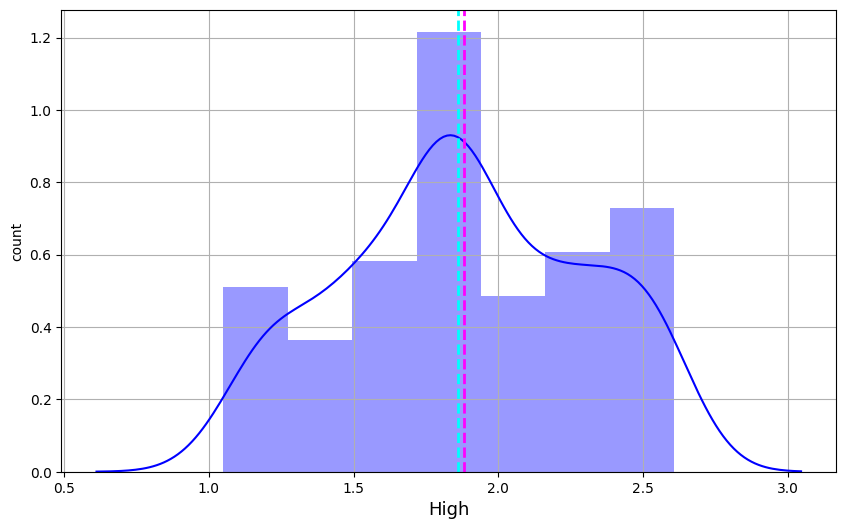

<ipython-input-34-6ba2dd27cc3a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df[col]), color='b')


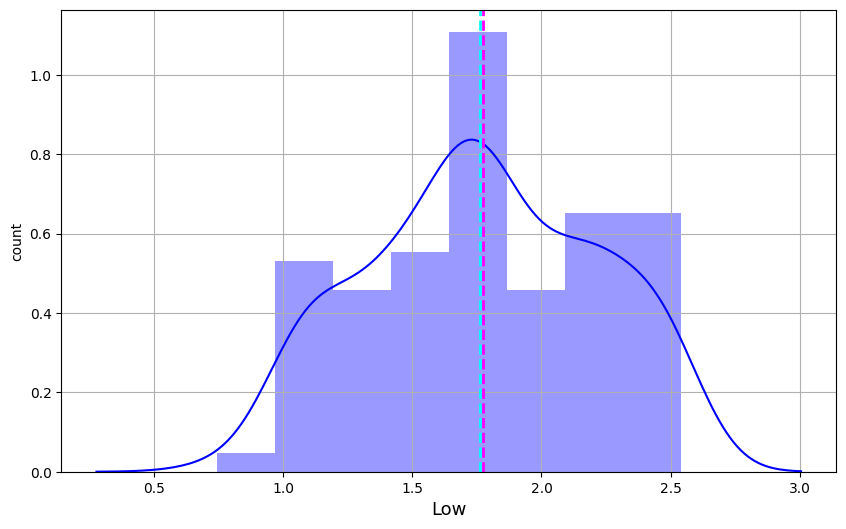

<ipython-input-34-6ba2dd27cc3a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df[col]), color='b')


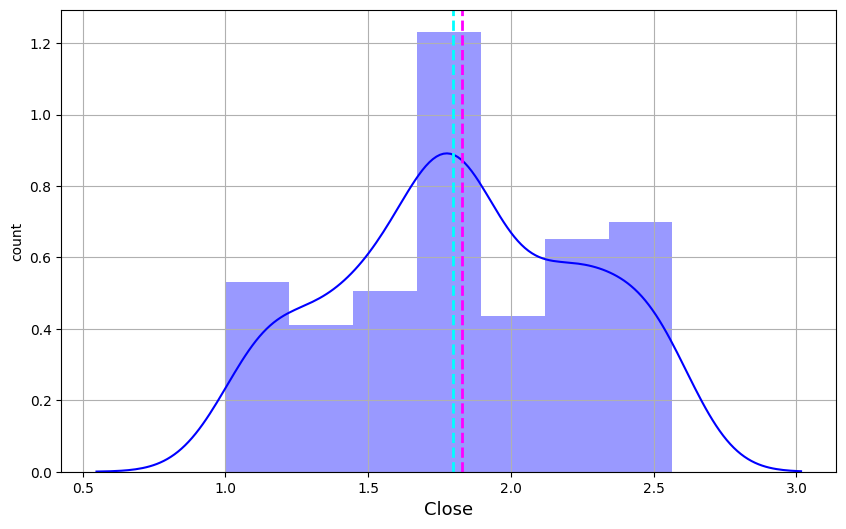

In [34]:
# Chart - 8 visualization code
for col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(np.log10(df[col]), color='b')
    plt.axvline(np.log10(df[col]).mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(np.log10(df[col]).median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')
    plt.grid()
    plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart involves distribution plots of the logarithm (base 10) of each numerical variable ('Open,' 'High,' 'Low,' and 'Close'), along with dashed lines indicating the mean and median values. This chart was selected to transform the data logarithmically, which is particularly useful when dealing with skewed distributions or extreme values that might affect the visualization of the data's characteristics.



##### 2. What is/are the insight(s) found from the chart?

From the distribution plots of the logarithmic transformations, insights can be drawn. The transformed distributions appear more symmetric and centered around the mean and median lines compared to the original data distributions. This suggests that the logarithmic transformation has helped to mitigate the effect of potential outliers or skewedness in the data. The presence of dashed lines representing the mean and median in each plot provides a clear visual reference for understanding the central tendencies.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the log-transformed distributions can have a positive impact on business decision-making by providing a clearer view of the data's distribution characteristics and central values. The symmetric and centered distributions can lead to more accurate assessments of the data's typical behavior and ranges, which can inform investment decisions and trading strategies. However, while the log transformation helps in managing extreme values, it might not directly address negative growth concerns. It is important to interpret the findings in the context of market conditions and other external factors that might contribute to negative growth. These insights can help in devising strategies to navigate market fluctuations and mitigate potential negative impacts on business growth.



#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***